In [307]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import seaborn as sns

In [308]:
df= pd.read_csv('Heart_attack.csv')
print(df.head())
print()

df.replace('?',np.nan, inplace=True)
print('BEFORE')
print(df.isna().sum())
df.drop(columns=['slope','thal','ca'],inplace=True)
print('AFTER')
print(df.isna().sum())

df.rename(columns={df.columns[-1]:'results'}, inplace=True)
df

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  

BEFORE
age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64
AFTER
age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach      

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,results
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [309]:

for i in range(0, len(df.columns)):
    print(df.iloc[:,i].dtype)
    df.iloc[:,i]= pd.to_numeric(df.iloc[:,i], errors='coerce')    

for i in range(0, len(df.columns)):
    df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].mean())   

df

int64
int64
int64
object
object
object
object
object
object
float64
int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,results
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1


sex_ratio is: 
 sex
1    0.72449
0    0.27551
Name: count, dtype: float64


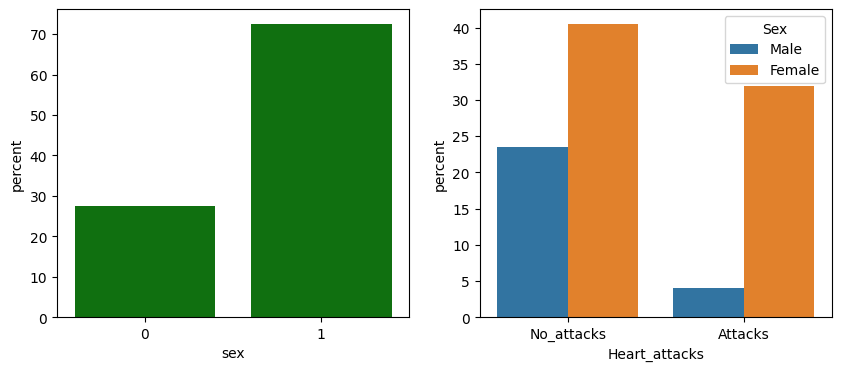

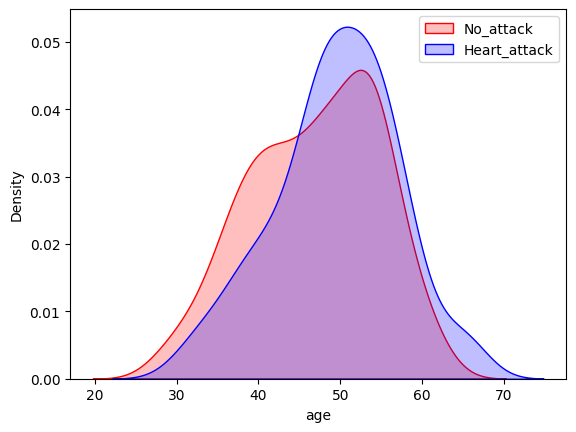

<Axes: >

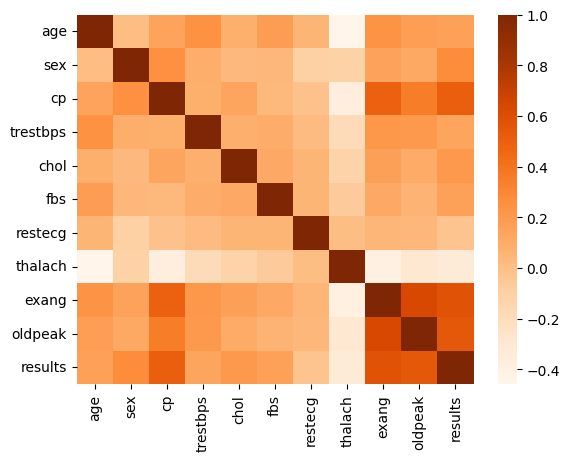

In [318]:
print('sex_ratio is:','\n',df['sex'].value_counts()/len(df['sex']))
fig,ax= plt.subplots(ncols=2, figsize=[10,4])
sns.countplot(data=df, x='sex',stat='percent',ax=ax[0],color='Green')
sns.countplot(data=df, x='results', hue='sex', stat='percent',ax=ax[1])
ax[1].set_xlabel('Heart_attacks')
ax[1].set_xticks(ticks=[0,1],labels=['No_attacks','Attacks'])
ax[1].legend(title='Sex',labels=['Male','Female'])
plt.show()
sns.kdeplot(df.age[df['results']==0], color='Red', fill='True', label='No_attack')
sns.kdeplot(df.age[df['results']==1], color='Blue', fill='True', label='Heart_attack')
plt.legend()
plt.show()
corr_results=df.corr()
sns.heatmap(corr_results,cmap='Oranges')


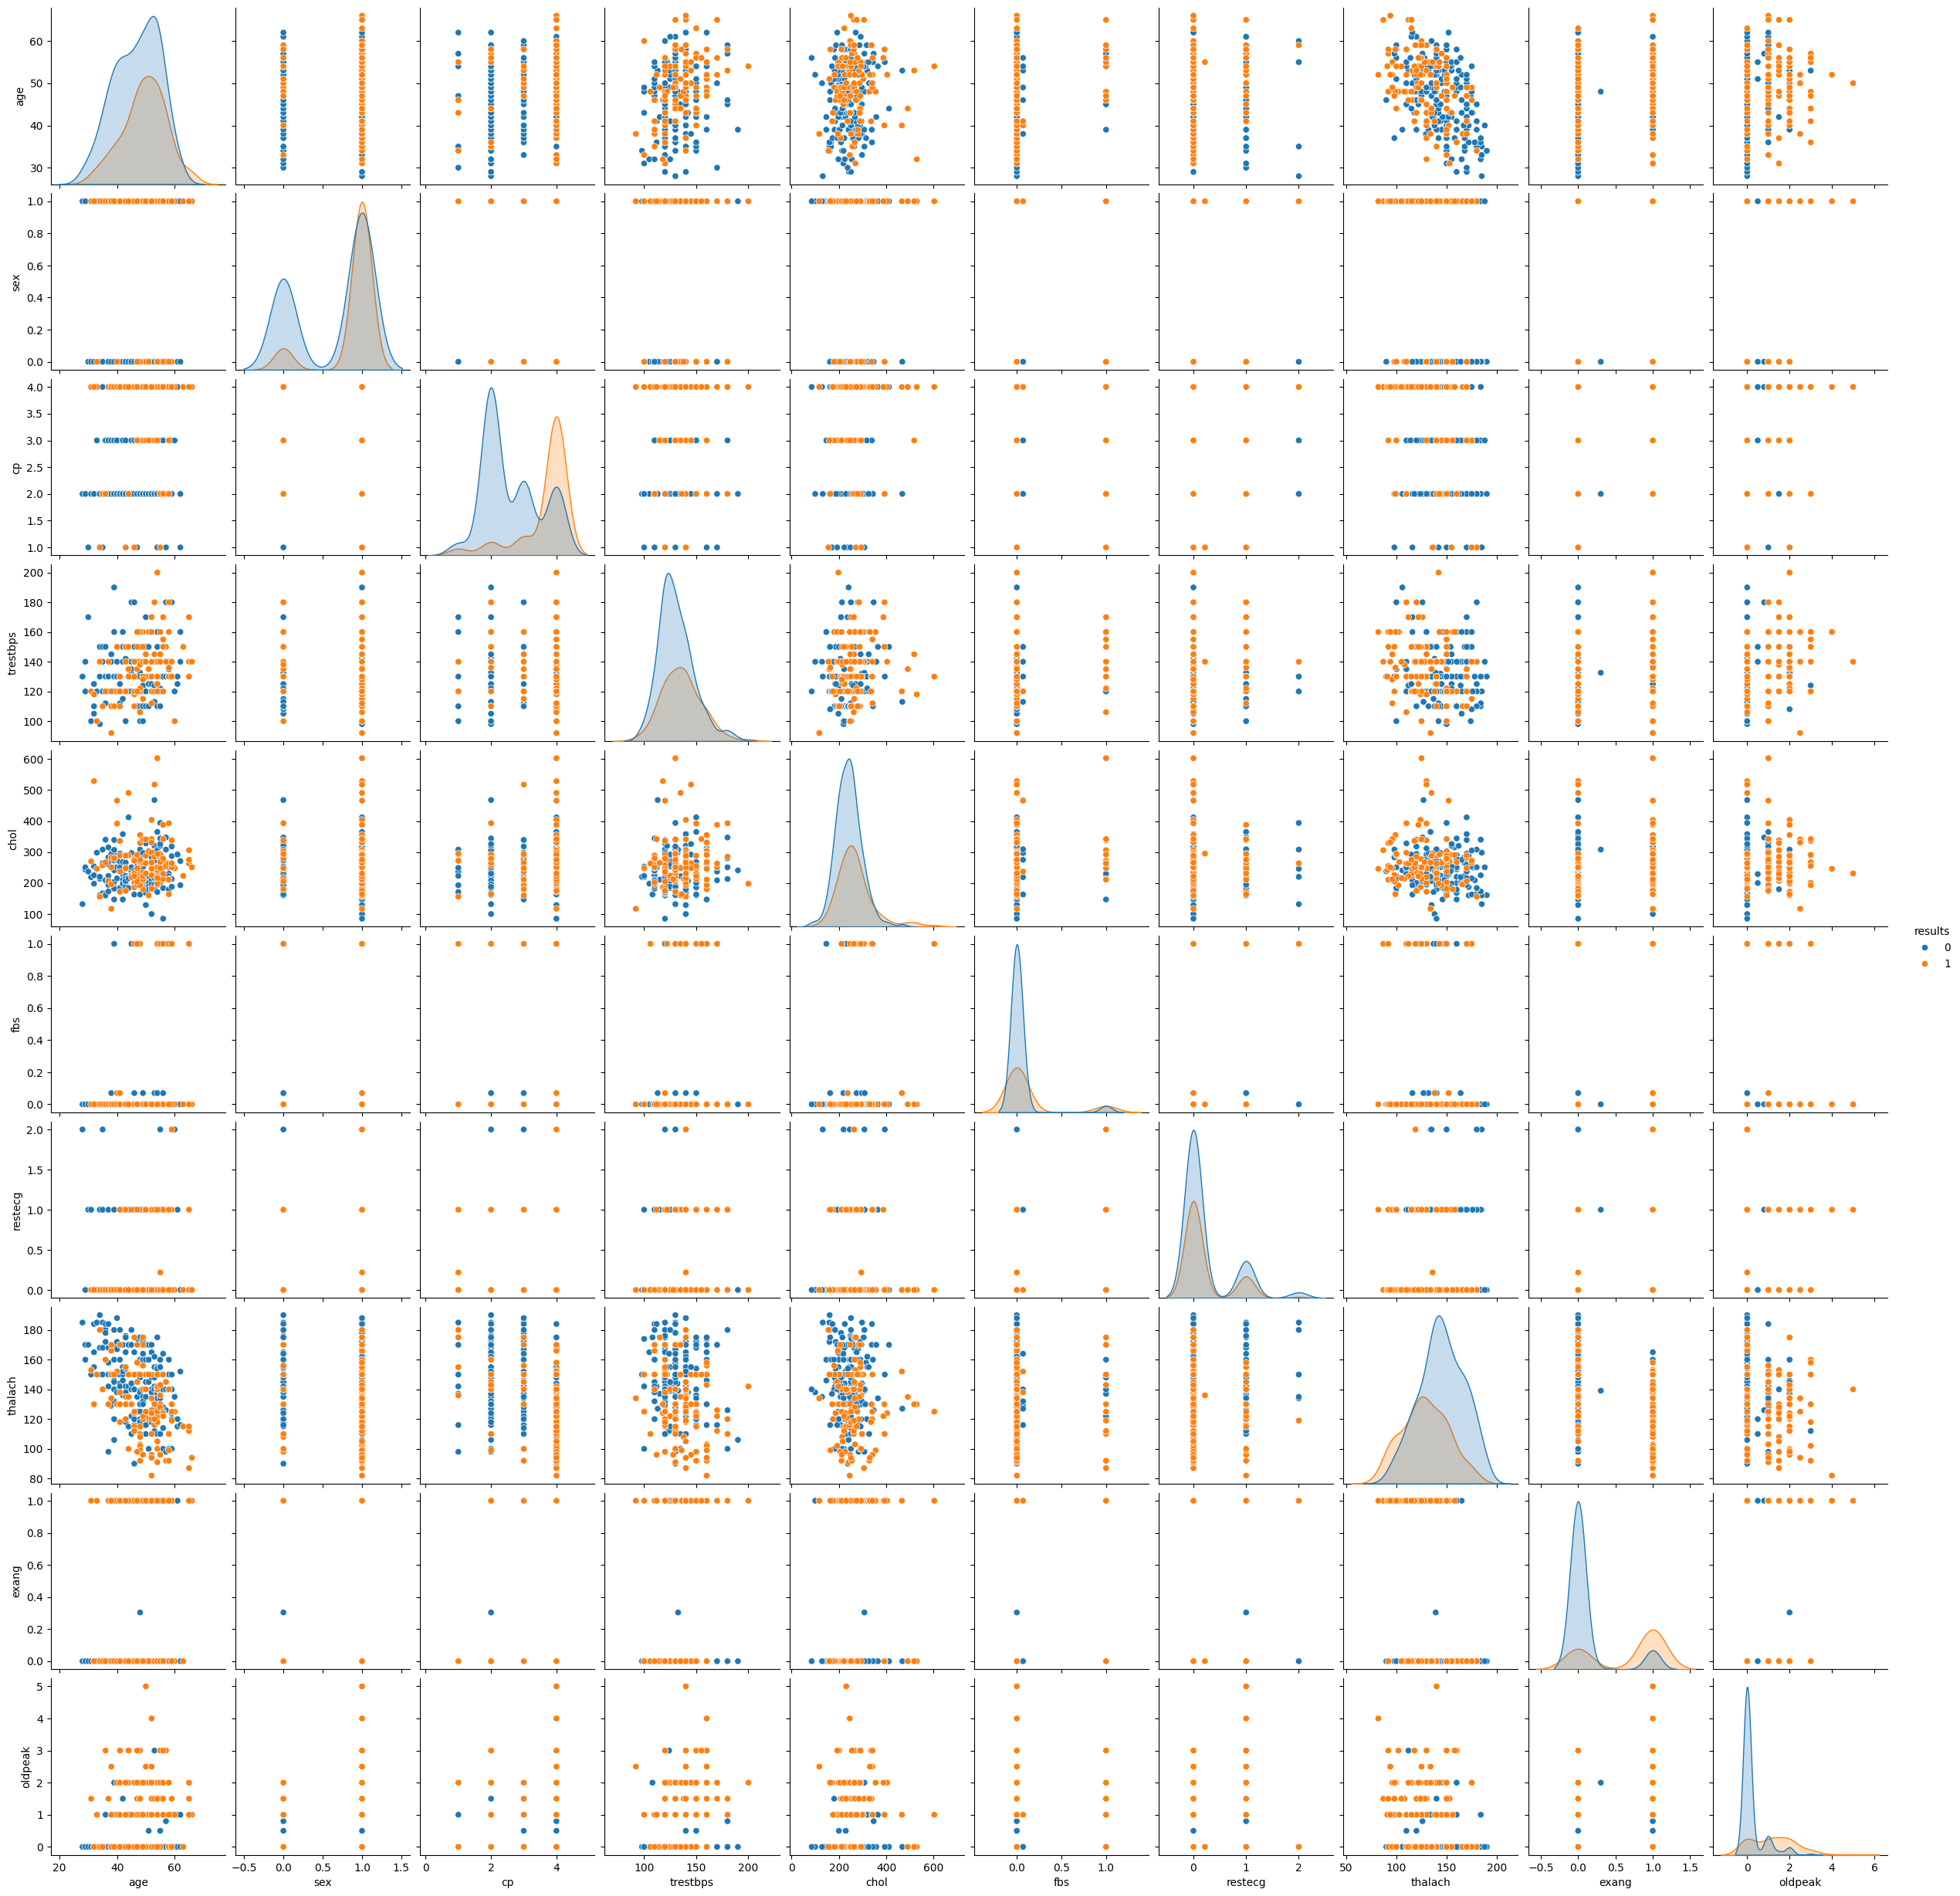

In [347]:
Y_lab= df.iloc[:,-1]
X_lab= df.drop(columns='results')
sns.pairplot(df, hue='results')

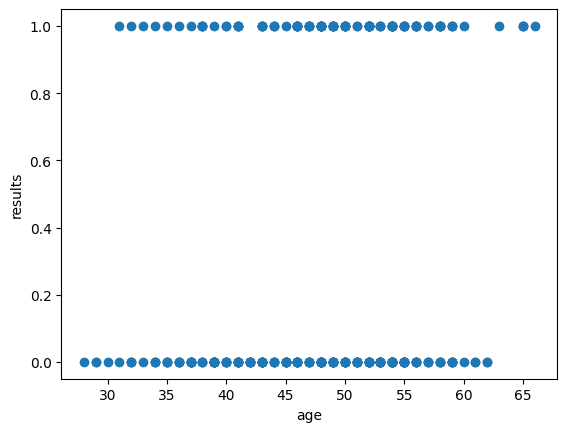

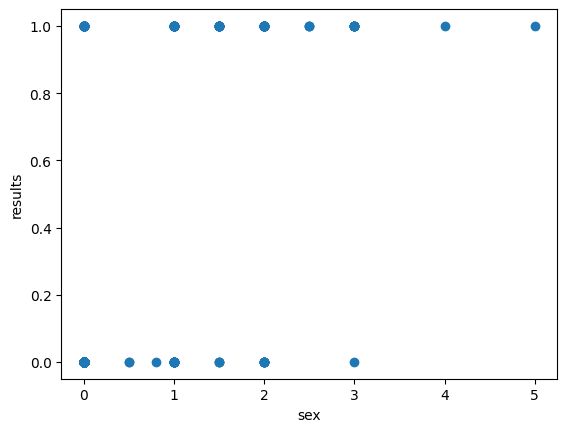

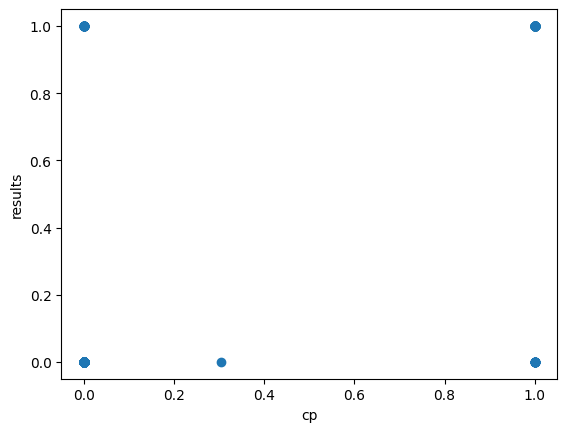

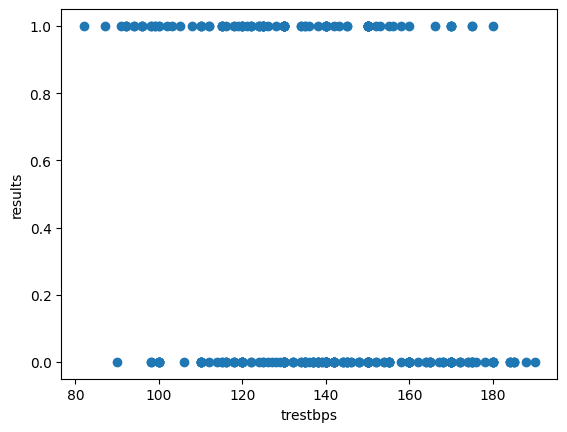

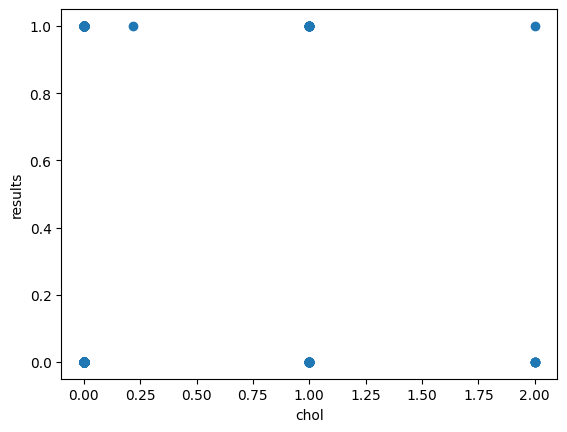

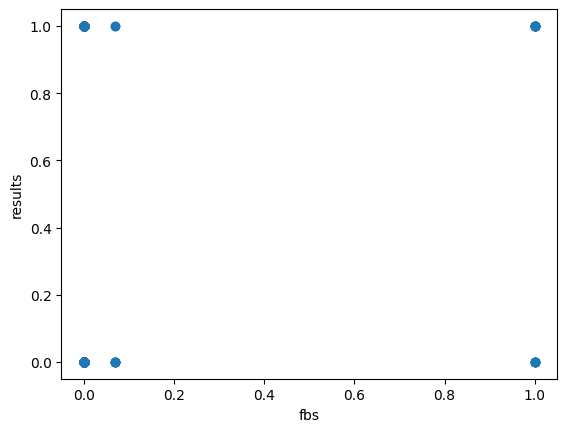

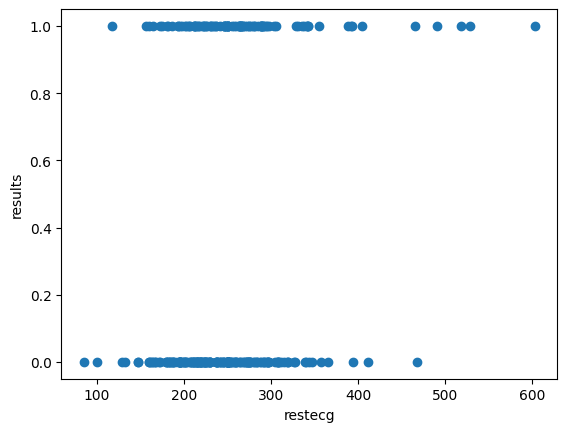

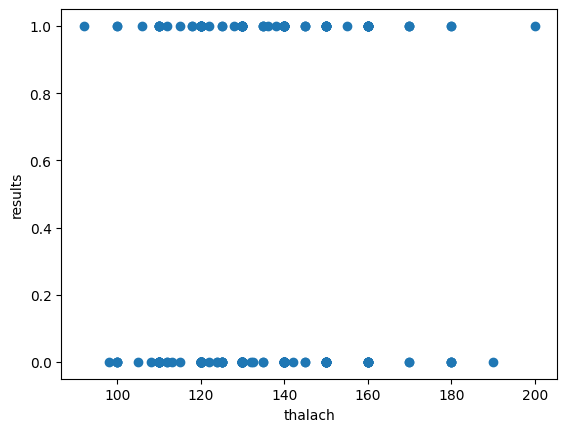

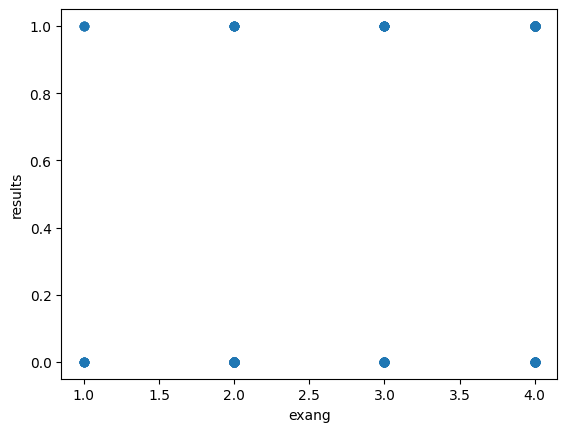

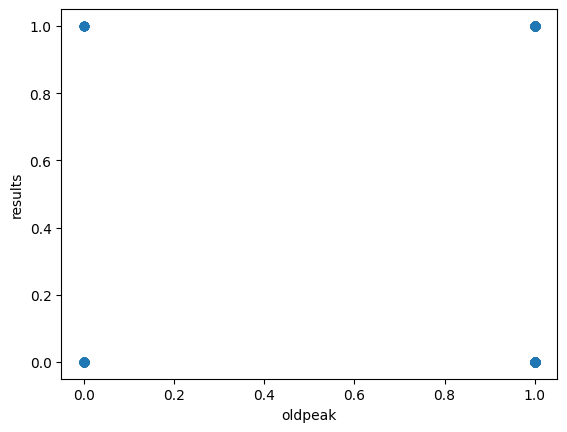

In [349]:
for i in range(0, len(X_lab.columns)):
    plt.scatter(X_lab.iloc[:,-i], Y_lab)
    plt.xlabel(f'{X_lab.columns[i]}')
    plt.ylabel(f'{df.columns[-1]}')
    plt.show()

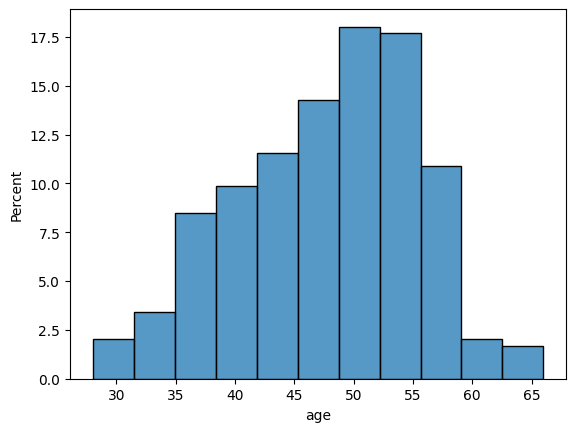

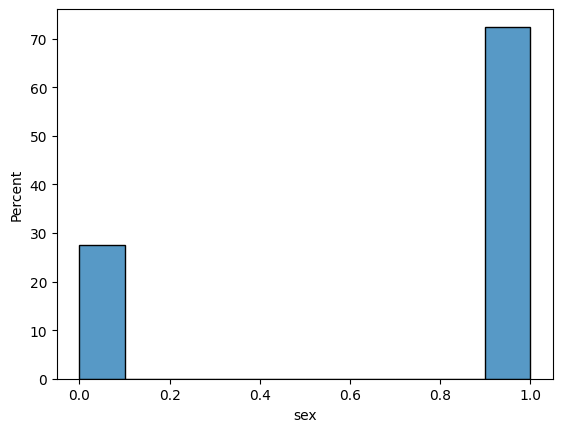

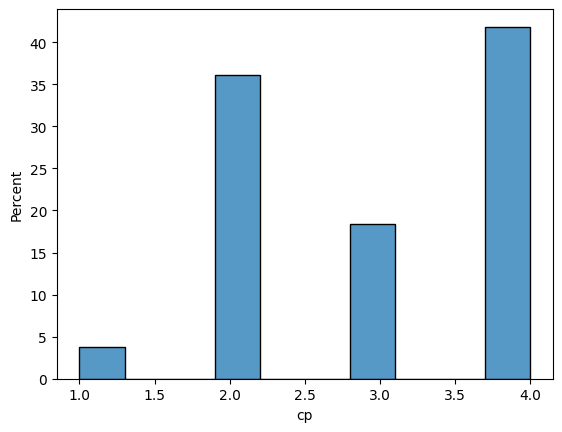

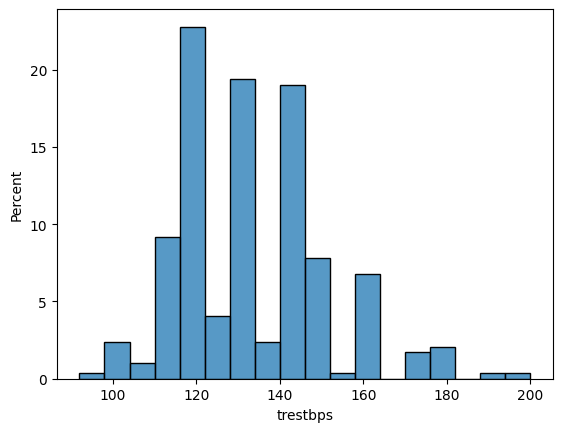

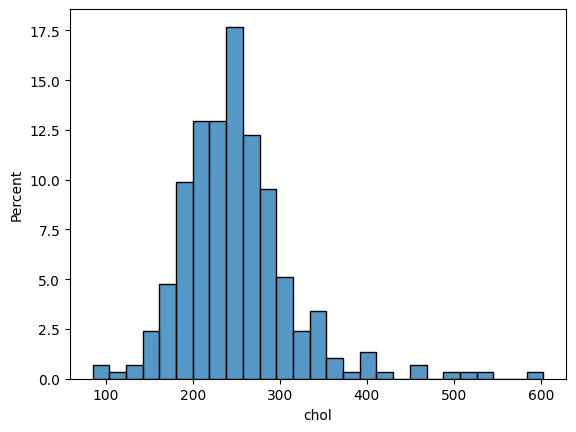

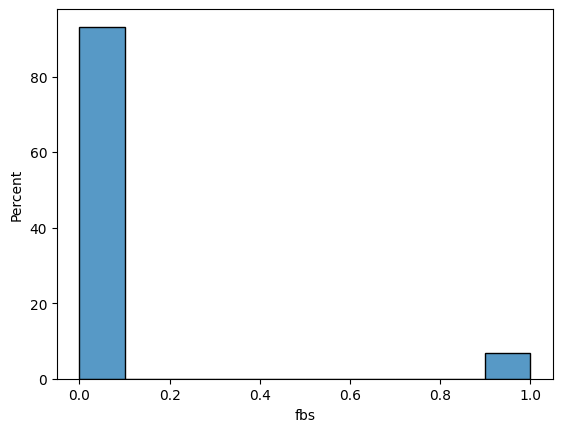

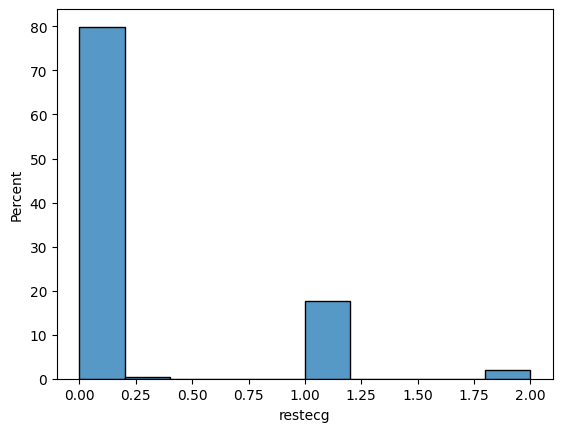

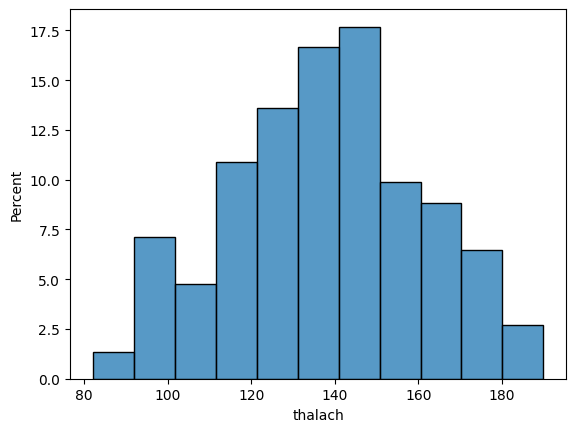

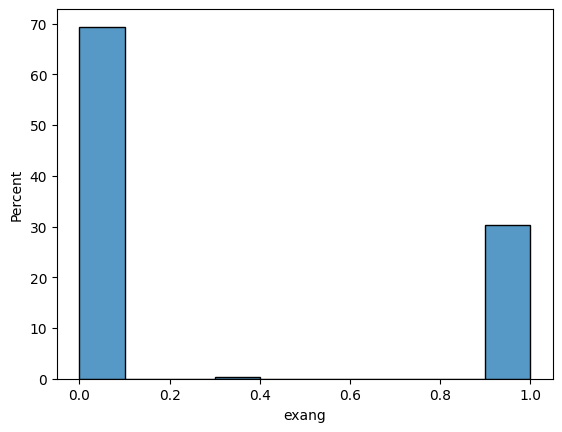

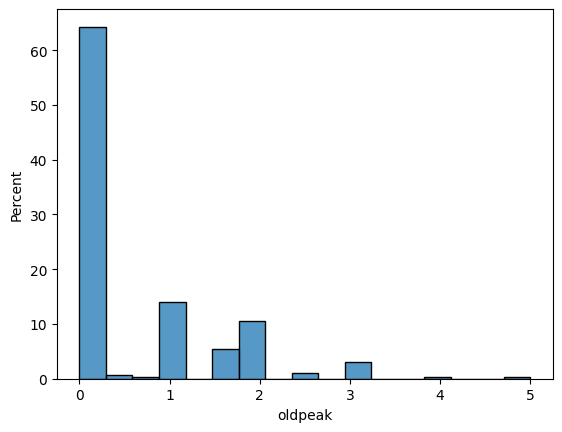

In [351]:
for i in range(0, len(X_lab.columns)):
    sns.histplot(X_lab.iloc[:,i], stat='percent')
    plt.show()

In [ ]:
def outliers(data,scale, column):
    Q1= data.quantile(0.25)
    Q3= data.quantile(0.75)
    IQR= Q3-Q1
    print('feature:', column)
    print('1st Quantile is',Q1,'and 3rd Quantile is',Q3)
    print('Inter_quantile range is',IQR)
    Q_min, Q_max= Q1-scale*IQR,Q3+ scale*IQR 
    df_net=data[(data<Q_min)|(data>Q_max)]

    return df_net

scale=1.5
for i in range(0, len(X_lab.columns)):
    df_net= outliers(X_lab.iloc[:,i],scale,X_lab.columns[i])
    df_net_count=df_net.count()/len(X_lab.iloc[:,i])
    print('unique outliers',df_net.unique())
    print('percentage of outliers',df_net_count*100 )
    print(" ")


feature: age
1st Quantile is 42.0 and 3rd Quantile is 54.0
Inter_quantile range is 12.0
unique outliers []
percentage of outliers 0.0
 
feature: sex
1st Quantile is 0.0 and 3rd Quantile is 1.0
Inter_quantile range is 1.0
unique outliers []
percentage of outliers 0.0
 
feature: cp
1st Quantile is 2.0 and 3rd Quantile is 4.0
Inter_quantile range is 2.0
unique outliers []
percentage of outliers 0.0
 
feature: trestbps
1st Quantile is 120.0 and 3rd Quantile is 140.0
Inter_quantile range is 20.0
unique outliers [190.0 180.0 200.0]
percentage of outliers 2.7210884353741496
 
feature: chol
1st Quantile is 211.25 and 3rd Quantile is 277.0
Inter_quantile range is 65.75
unique outliers [412.0 100.0 468.0 394.0 85.0 466.0 529.0 392.0 603.0 404.0 518.0 388.0
 491.0 393.0]
percentage of outliers 4.761904761904762
 
feature: fbs
1st Quantile is 0.0 and 3rd Quantile is 0.0
Inter_quantile range is 0.0
unique outliers [0.06993006993006994 1.0]
percentage of outliers 9.523809523809524
 
feature: restecg

: 